In [11]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import re
from collections import defaultdict

/Users/hackinteachk./.pyenv/versions/3.7.4/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [66]:
data = defaultdict(list)
with open("mem_result.txt", "r") as f:
    while f.readable():
        f.readline()
        n = f.readline()
        num = re.match(r"^\[([0-9]{1,2})\]$" ,n).group(1)
        for i in range(4):
            value = np.float(f.readline().strip("\n"))
            data[num].append(value)
        if num == "60":
            break

In [67]:
x = list(map(int, data.keys()))
y = np.array(list(data.values()))

In [68]:
labels=["Copy", "Scale", "Add", "Triad"]
plt.figure(figsize=(10,7))
for i, l in enumerate(labels):
    plt.plot(x,y[:,i], label=l)
plt.legend()
plt.xticks(ticks=np.arange(0, len(data), 2));
plt.yticks(ticks=np.arange(3000, 10_000, 500));
plt.grid()

In [7]:
from json import load

In [55]:
di=load(open("output/data.json"))
data = dict()
for k, v in di.items():
    func, fn, ver = list(map(str.strip, k.split(",")))
    fn = int(re.match(r"^data/size-(\d{1,}).csv$", fn).group(1))
    if func not in data:
        data[func] = dict()
    if fn not in data[func]:
        data[func][fn] = dict()
    data[func][fn][ver] = v["nanos"]

In [56]:
from pprint import pprint
pprint(data)

{'Fac': {10000: {'4nproc': 4133499,
                 'n_spawn': 20982427,
                 'par_iter': 1132565,
                 'sqrt_n': 2368822},
         100000: {'4nproc': 12156536,
                  'n_spawn': 106529165,
                  'par_iter': 4527844,
                  'sqrt_n': 12902475}},
 'Multiply': {10000: {'4nproc': 7519722,
                      'n_spawn': 17620570,
                      'par_iter': 808408,
                      'sqrt_n': 4760856},
              100000: {'4nproc': 9293637,
                       'n_spawn': 97025850,
                       'par_iter': 2551630,
                       'sqrt_n': 11502864}}}


In [62]:
result = dict()

for alg, d in data.items():
    result[alg] = dict()
    for size, map_ver in d.items():
        for ver, tm in map_ver.items():
            if ver not in result[alg]:
                result[alg][ver] = {"x":[], "y": []}
            result[alg][ver]["x"].append(size)
            result[alg][ver]["y"].append(tm)
result

{'Fac': {'4nproc': {'x': [10000, 100000], 'y': [4133499, 12156536]},
  'n_spawn': {'x': [10000, 100000], 'y': [20982427, 106529165]},
  'par_iter': {'x': [10000, 100000], 'y': [1132565, 4527844]},
  'sqrt_n': {'x': [10000, 100000], 'y': [2368822, 12902475]}},
 'Multiply': {'4nproc': {'x': [10000, 100000], 'y': [7519722, 9293637]},
  'n_spawn': {'x': [10000, 100000], 'y': [17620570, 97025850]},
  'par_iter': {'x': [10000, 100000], 'y': [808408, 2551630]},
  'sqrt_n': {'x': [10000, 100000], 'y': [4760856, 11502864]}}}

4nproc
n_spawn
par_iter
sqrt_n
4nproc
n_spawn
par_iter
sqrt_n


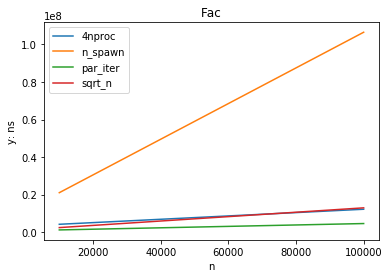

In [68]:
for alg, vers in result.items():
    plt.figure()
    plt.title(alg)
    plt.xlabel("n")
    plt.ylabel("y: ns")
    for v, pts in vers.items():
        print(v)
        plt.plot(pts['x'], pts['y'], label=v)
    plt.legend()

In [61]:
plt.plot([1,5], [2,3])